## Análisis de la Correlación o Dependencia Espacial: Modelos de regresión espacial

Además de `geopandas`para representar mapas, utilizaremos el paquete `spreg`  y  `weights` incluidos dentro del macro-proyecto `PySAL` 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd


# OPCION 1 PARA CARGA DE LIBRERIAS PARA ESTADISTICA ESPACIAL
# puedo instalar toda la meta-librería pysal (Ojo que tarda)
# conda install --channel conda-forge pysal

# y después cargar los paquetes y funciones que vamos a utilizar
# from pysal.lib import weights  # Para Construir la matriz de pesos espaciales
# from pysal.explore import esda  # Exploratory Spatial analytics
# from pysal.model import spreg   # Para los modelos de regresion espacial
# from pysal.viz import splot   # para conectar los análisis espaciales hechos en PySAL con herramientas de visaluización como matplotly
# from splot import esda as esdaplot
# from splot.esda import plot_moran    # para los gráficos de Moran


# OPCION 2 PARA CARGA DE LIBRERIAS PARA ESTADISTICA ESPACIAL
# O MEJOR (esta opción 2 es la que os recomiendo), puedo instalar solo los paquetes que me interesan del metaproyecto pysal
# conda install --channel conda-forge libpysal
# conda install --channel conda-forge esda
# conda install --channel conda-forge spreg
# conda install --channel conda-forge splot

# y después cargar las funciones y métodos que utilizaremos en la práctica
from libpysal import weights
import esda
import spreg
from splot import esda as esdaplot
from splot.esda import plot_moran    # para los gráficos de Moran


In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from pysal.lib import weights
from pysal.explore import esda

C:\Users\eugen\anaconda3\Lib\site-packages\spaghetti\network.py:42: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)


C:\Users\eugen\AppData\Local\Temp\ipykernel_4576\2230430609.py:3: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  wq = weights.contiguity.Queen.from_dataframe(gdfm)
C:\Users\eugen\anaconda3\Lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 19 disconnected components.
 There are 8 islands with ids: 816, 2536, 5326, 7061, 7160, 7229, 8106, 8107.
  W.__init__(self, neighbors, ids=ids, **kw)


('WARNING: ', 816, ' is an island (no neighbors)')
('WARNING: ', 2536, ' is an island (no neighbors)')
('WARNING: ', 5326, ' is an island (no neighbors)')
('WARNING: ', 7061, ' is an island (no neighbors)')
('WARNING: ', 7160, ' is an island (no neighbors)')
('WARNING: ', 7229, ' is an island (no neighbors)')
('WARNING: ', 8106, ' is an island (no neighbors)')
('WARNING: ', 8107, ' is an island (no neighbors)')


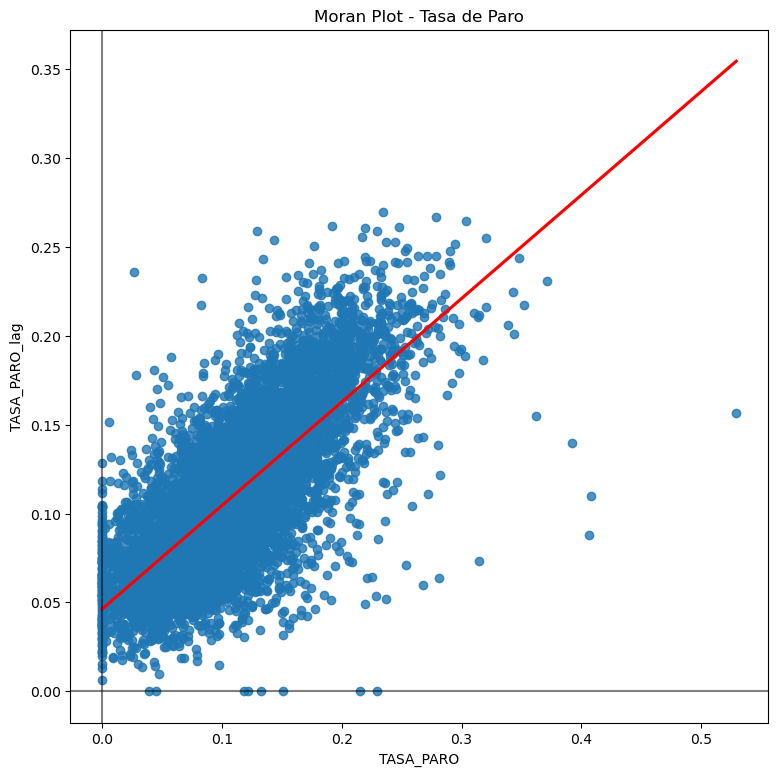

In [4]:
gdfm =gpd.read_file("cartografias/Munic04_ESP.shp")

wq = weights.contiguity.Queen.from_dataframe(gdfm)
wq.transform = "R"

gdfm["TASA_PARO_lag"] = weights.spatial_lag.lag_spatial(wq, gdfm["TASA_PARO"])


f, ax = plt.subplots(1, figsize=(9, 9))
sns.regplot(
     x="TASA_PARO",
     y="TASA_PARO_lag",
     ci=None,
     data=gdfm,
     line_kws={"color": "r"})
ax.axvline(0, c="k", alpha=0.5)
ax.axhline(0, c="k", alpha=0.5)
ax.set_title("Moran Plot - Tasa de Paro")
plt.show()
moran = esda.moran.Moran(gdfm["TASA_PARO"], wq)

In [12]:
#help(moran)
moran.p_norm

0.0

In [13]:
>>> import geopandas as gpd
>>> import matplotlib.pyplot as plt
>>> import seaborn as sns
>>> from pysal.lib import weights
>>> from pysal.explore import esda
>>> from pysal.model import spreg

>>> gdfm =gpd.read_file("cartografias/Munic04_ESP.shp")

>>> wq = weights.contiguity.Queen.from_dataframe(gdfm)
>>> wq.transform = "R"



# MODELO (A)

modelo_A = spreg.OLS(
     # Dependent variable
     gdfm[["TASA_PARO"]].values,
     # Independent variables
     gdfm[["RENTPCAP07"]].values,
     # Dependent variable name
     name_y="TASA_PARO",
     # Independent variable name
     name_x=["RENTA_PERCAPITA"])

gdfm["residual"] = modelo_A.u

moran = esda.moran.Moran(gdfm["residual"], wq)
print("I de moran:", moran.I.round(3))
print("p-valor:", moran.p_sim)


# MODELO (B)

modelo_B = spreg.GM_Error_Het(
# Dependent variable
gdfm[["TASA_PARO"]].values,
# Independent variables
gdfm[["RENTPCAP07"]].values,
# Spatial weights matrix
w=wq,
# Dependent variable name
name_y="TASA_PARO",
# Independent variable name
name_x=["RENTA_PERCAPITA"])  
  
gdfm["mLagresidual"] = modelo_B.e_filtered

moran = esda.moran.Moran(gdfm["mLagresidual"], wq)
print("I de moran:", moran.I.round(3))
print("p-valor:", moran.p_sim)


C:\Users\eugen\AppData\Local\Temp\ipykernel_4576\2356728526.py:10: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  wq = weights.contiguity.Queen.from_dataframe(gdfm)
C:\Users\eugen\anaconda3\Lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 19 disconnected components.
 There are 8 islands with ids: 816, 2536, 5326, 7061, 7160, 7229, 8106, 8107.
  W.__init__(self, neighbors, ids=ids, **kw)


('WARNING: ', 816, ' is an island (no neighbors)')
('WARNING: ', 2536, ' is an island (no neighbors)')
('WARNING: ', 5326, ' is an island (no neighbors)')
('WARNING: ', 7061, ' is an island (no neighbors)')
('WARNING: ', 7160, ' is an island (no neighbors)')
('WARNING: ', 7229, ' is an island (no neighbors)')
('WARNING: ', 8106, ' is an island (no neighbors)')
('WARNING: ', 8107, ' is an island (no neighbors)')
I de moran: 0.581
p-valor: 0.001
I de moran: -0.066
p-valor: 0.001


In [2]:
import geopandas as gpd

gdfm =gpd.read_file("cartografias/Munic04_ESP.shp") 
gdfm_Madrid =gdfm[gdfm['COD_PROV']=='28']


gdfm_Madrid.explore(column='PrecioIn16', 
                    scheme='NaturalBreaks',
                    k=9, cmap='YlOrRd',
                       legend=False,
                    style_kwds=dict(fillOpacity=0.8)) 

C:\Users\eugen\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\eugen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Objetivo de la práctica: La Ley de Okun
Queremos estimar la ley de OKUN con datos Municipales, en este caso para explicar la Tasa de Paro Municipal en función de la renta percápita Municipal. Al tener datos georeferenciados nos preguntaremos si en la explicación de la tasa de paro municipal existen correlaciones espaciales con los municipio vecinos, y en tal caso presentaremos dos modelos para intentar estimar dichos efectos espaciales

### Cargamos la cartografía

In [ ]:
gdfm =gpd.read_file("cartografias/Munic04_ESP.shp")
#gdfm=gdfm.to_crs(epsg=3857)
gdfm.info()


Comenzamos Analizando los datos de Renta Per cápita

In [ ]:
gdfm[["MUN","RENTPCAP07"]].sort_values(by='RENTPCAP07',ascending=False).head(15)



In [ ]:
sns.displot(x=gdfm.RENTPCAP07, kind="kde", fill=True)
plt.show()

In [ ]:
map=gdfm.plot(column='RENTPCAP07', 
         scheme='quantiles',
         k=8, cmap='YlOrRd',
         legend=True,
         figsize=(10,10),
         legend_kwds={'loc': 'lower right', 'fontsize':'8', 'title':'Renta Percápita'} 
)
map.set_axis_off()       

Nuestra Variable dependiente (Variable Objetivo) es la **tasa de desempleo municipal**

In [ ]:
sns.displot(x=gdfm.TASA_PARO, kind="kde", fill=True)
plt.show()

In [ ]:
map=gdfm.plot(column='TASA_PARO', 
         scheme='quantiles',
         k=8, cmap='PuBuGn',
         legend=True,
         figsize=(10,10),
         legend_kwds={'loc': 'lower right', 'fontsize':'8', 'title':'Tasa Paro'} 
)
map.set_axis_off() 

plt.savefig('Tasa_paro.jpg') 

## Construcción de la Matriz de Pesos

Las matrices de pesos o de importancias espaciales pueden construirse por vecindad-contigüidad o por distancia

### Matrices de pesos por contigüidad

In [ ]:
# Matriz de pesos por vecindad tipo torre
wr = weights.contiguity.Rook.from_dataframe(gdfm)


In [ ]:
print(wr.n)

In [ ]:
wr.neighbors

In [ ]:
# Representación de la matriz de contiguidades:

pd.DataFrame(*wr.full()).astype(int)

In [ ]:
print(wr.n**2)

print(wr.nonzero)

print(wr.nonzero/wr.n**2)
wr.pct_nonzero # % de nonzeros, es una medida de la densidad de 1

In [ ]:
# Matriz de pesos por vecindad tipo reina
wq = weights.contiguity.Queen.from_dataframe(gdfm)


In [ ]:
wq.neighbors

In [ ]:
print(wq.n)

In [ ]:
wq.weights

In [ ]:
# Cardinal del número de vecinos para cada observación
wq.cardinalities

In [ ]:
wq.histogram

In [ ]:
pd.Series(wq.cardinalities).describe()


In [ ]:
pd.Series(wq.cardinalities).plot.hist(color="k")

In [ ]:
# Plot graph connections
ax = gdfm.plot(
        edgecolor="grey", facecolor="w",
        figsize=(10,10)
    )
plt.xlim(-2.5,2.5)
plt.ylim(37,40)

wq.plot(
    gdfm,
    edge_kws=dict(linewidth=1, color="orangered"),
    node_kws=dict(marker="*"),
    ax=ax
)

plt.show()


In [ ]:
wq.islands

### Pesos Basados en Distancias
#### K-Nearest Neighbor weights

In [ ]:
wk4 = weights.distance.KNN.from_dataframe(gdfm, k=4)

In [ ]:
wk4.islands

In [ ]:
ax = gdfm.plot(
        edgecolor="grey", facecolor="w",
        figsize=(10,10)
    )
plt.xlim(-2.5,2.5)
plt.ylim(37,40)


wk4.plot(
    gdfm,
    edge_kws=dict(linewidth=1, color="orangered"),
    node_kws=dict(marker="*"),
    ax=ax
)

plt.show()


### Kernel weights

Kernel weights son pesos inversamente proporcionales a la distancia. Reflejan la primera ley de Tobler, la importancia espacial tiende a caer con la distancia (afecta más lo más cercano)

In [ ]:
# Kernel weights
w_kernel = weights.distance.Kernel.from_dataframe(gdfm)

### Distance bands and hybrid Weights

La matriz de pesos ahora refleja el hecho de que sólo los vecinos próximos (los que están en un radio de x kms) tienen un peso positivo

In [ ]:
w_bdb = weights.distance.DistanceBand.from_dataframe(
    gdfm, 1.5, binary=True
)

El radio máximo también puede conjugarse con la importancia o peso inversamente proporcional a la distancia. Es como un Kernel Censurado, ya que la función kernel sólo se aplica a los vecinos próximos (dentro de un radio x) 

In [ ]:
w_hy = weights.distance.DistanceBand.from_dataframe(
    gdfm, 1.5, binary=False
)

In [ ]:
w_hy.weights

Hay otras formas de calcular pesos, como por bloques. Tambien exista la posibilidad de unir dos o más matrices de pesos (y también se puede editar manualmente una matriz de pesos si fuese necesario)

In [ ]:
w_bw = weights.util.block_weights(gdfm["CCAA"].values)
w_bw.weights

In [ ]:
w_u = weights.set_operations.w_union(wq, wk4)
w_u.weights

In [ ]:
w_u.islands

## Retardos espaciales


Para poder utilizar la matriz de pesos espaciales como operador retardos necesitamos que estén normalizada por filas

In [ ]:
wq.weights

In [ ]:
# Transformar pesos por filas
wq.transform = "R"

In [ ]:
w_u.transform = "R"

In [ ]:
w_u.weights

In [ ]:
# Creación de variables con retardo espacial
gdfm["TASA_PARO_lag"] = weights.spatial_lag.lag_spatial(
    wq, gdfm["TASA_PARO"]
)


In [ ]:
# representación de la tasa de paro retardada
map=gdfm.plot(column='TASA_PARO_lag', 
         scheme='quantiles',
         k=8, cmap='PuBuGn',
         legend=True,
         figsize=(10,10),
         legend_kwds={'loc': 'lower right', 'fontsize':'8', 'title':'Tasa Paro Retardada'} 
)
map.set_axis_off() 

plt.savefig('Tasa_paro_lag.jpg') 


## Autocorrelación Espacial

Tenemos ya dos variables para cada municipio: la Tasa de Paro del Municipio, y la Tasa de Paro media de los municipios cercanos/vecinos   
Ya podemos cuantificar la asosciación o correlación espacial analizando la correlación que existe entre estas dos variables


In [ ]:
# AutoCorrelación Espacial
f, ax = plt.subplots(1, figsize=(9, 9))
sns.regplot(
    x="TASA_PARO",
    y="TASA_PARO_lag",
    ci=None,
    data=gdfm,
    line_kws={"color": "r"},
)
ax.axvline(0, c="k", alpha=0.5)
ax.axhline(0, c="k", alpha=0.5)
ax.set_title("Moran Plot - Tasa de Paro")
plt.show()

No puede utilizarse el coeficiente de correlación de person, porque hay que tener en cuenta los pesos espaciales. Debemos utilizar la I de Moran

In [ ]:
# Correlación Espacial: La I de Moran
moran = esda.moran.Moran(gdfm["TASA_PARO"], wq)
print("I de moran:", moran.I.round(3))
print("p-valor:", moran.p_sim)

### Correlación Espacial Local

No todos lso Municipios tienen que presentar dependencia espacial con sus vecinos. PAra analizar qué municipios sí presentan y cuáles no, se utiliza la correlación espacial Local (LISA: Local Indicator of Spatial autocorrelation)

In [ ]:
#Correlación Espacial Local
lisa = esda.moran.Moran_Local(gdfm["TASA_PARO"], wq)

In [ ]:
#Representación del Indice de Moran Local (Is)
# Draw KDE line
ax = sns.kdeplot(lisa.Is)
# Add one small bar (rug) for each observation
# along horizontal axis
sns.rugplot(lisa.Is, ax=ax);

In [ ]:
# Set up figure and axes
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()

# Subplot 1 #
# Choropleth of local statistics
# Grab first axis in the figure
ax = axs[0]
# Assign new column with local statistics on-the-fly
gdfm.assign(
    Is=lisa.Is
    # Plot choropleth of local statistics
).plot(
    column="Is",
    cmap="PuBuGn",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.1,
    alpha=0.75,
    legend=True,
    ax=ax,
)

# Subplot 2 #
# Quadrant categories
# Grab second axis of local statistics
ax = axs[1]
# Plot Quandrant colors (note to ensure all polygons are assigned a
# quadrant, we "trick" the function by setting significance level to
# 1 so all observations are treated as "significant" and thus assigned
# a quadrant color
esdaplot.lisa_cluster(lisa, gdfm, p=1, ax=ax)

# Subplot 3 #
# Significance map
# Grab third axis of local statistics
ax = axs[2]
#
# Find out significant observations
labels = pd.Series(
    1 * (lisa.p_sim < 0.05),  # Assign 1 if significant, 0 otherwise
    index=gdfm.index  # Use the index in the original data
    # Recode 1 to "Significant and 0 to "Non-significant"
).map({1: "Significant", 0: "Non-Significant"})
# Assign labels to `db` on the fly
gdfm.assign(
    cl=labels
    # Plot choropleth of (non-)significant areas
).plot(
    column="cl",
    categorical=True,
    k=2,
    cmap="Paired",
    linewidth=0.1,
    edgecolor="white",
    legend=True,
    ax=ax,
)


# Subplot 4 #
# Cluster map
# Grab second axis of local statistics
ax = axs[3]
# Plot Quandrant colors In this case, we use a 5% significance
# level to select polygons as part of statistically significant
# clusters
esdaplot.lisa_cluster(lisa, gdfm, p=0.05, ax=ax)

# Figure styling #
# Set title to each subplot
for i, ax in enumerate(axs.flatten()):
    ax.set_axis_off()
    ax.set_title(
        [
            "Local Statistics",
            "Scatterplot Quadrant",
            "Statistical Significance",
            "Moran Cluster Map",
        ][i],
        y=0,
    )
# Tight layout to minimise in-betwee white space
f.tight_layout()

# Display the figure
plt.show()

Podemos asignar el cluster LISA (cuadrante y significatividad) como una variable adicional a la cartografía

In [ ]:
# Assign pseudo P-values to `gdfm`
gdfm["p-sim"] = lisa.p_sim
# `1` if significant (at 5% confidence level), `0` otherwise
sig = 1 * (lisa.p_sim < 0.05)
# Assign significance flag to `db`
gdfm["sig"] = sig

# Pick as part of a quadrant only significant polygons,
# assign `0` otherwise (Non-significant polygons)
spots = lisa.q * sig
# Mapping from value to name (as a dict)
spots_labels = {
    0: "Non-Significant",
    1: "HH",
    2: "LH",
    3: "LL",
    4: "HL",
}
# Create column in `db` with labels for each polygon
gdfm["labels"] = pd.Series(
    # First initialise a Series using values and `db` index
    spots,
    index=gdfm.index
    # Then map each value to corresponding label based
    # on the `spots_labels` mapping
).map(spots_labels)
# Print top for inspection
gdfm["labels"].head(20)

In [ ]:
gdfm["labels"].value_counts()

# Regresión Espacial

Comenzamos haciendo una regresión lineal de la Ley de Okun por mínimos cuadrados ordinarios sin tener en cuenta que, com ya hemos visto, la tasa de Paro presenta un alta dependencia o correlación espacial    

$ TasaParo_i = \beta_0 + \beta_1*RentaPc_i + u_i$

In [ ]:
#Regresión MCO
m1 = spreg.OLS(
    # Dependent variable
    gdfm[["TASA_PARO"]].values,
    # Independent variables
    gdfm[["RENTPCAP07"]].values,
    # Dependent variable name
    name_y="TASA_PARO",
    # Independent variable name
    name_x=["RENTA_PERCAPITA"]
)

print(m1.summary)



In [ ]:
# Create column with residual values from m1
gdfm["residual"] = m1.u

Diagnosis de los residuos ¿Son Ruido blanco?

In [ ]:
gdfm["lag_residual"] = weights.spatial_lag.lag_spatial(wq, m1.u)


In [ ]:
f, ax = plt.subplots(1, figsize=(9, 9))
sns.regplot(
    x="residual",
    y="lag_residual",
    ci=None,
    data=gdfm,
    line_kws={"color": "r"},
)
ax.axvline(0, c="k", alpha=0.5)
ax.axhline(0, c="k", alpha=0.5)
ax.set_title("Moran Plot - Residuos Modelo Regresión")
plt.show()

In [ ]:
# Correlación Espacial: La I de Moran
moran = esda.moran.Moran(gdfm["residual"], wq)
print("I de moran:", moran.I.round(3))
print("p-valor:", moran.p_sim)

In [ ]:
# representación de los residuos MCO  retardada
map=gdfm.plot(column='residual', 
         scheme='quantiles',
         k=8, cmap='PuBuGn',
         legend=True,
         figsize=(10,10),
         legend_kwds={'loc': 'lower right', 'fontsize':'8', 'title':'Residuos MCO'} 
)
map.set_axis_off() 

plt.savefig('Residuos_MCO_Tasa_paro.jpg') 

Estimación de un modelo con retardo espacial

In [ ]:
# Regresión lag espatial con librería `spreg` y representación de los rsiduos

# (GMM estimation allowing for heteroskedasticity)
mLag = spreg.GM_Error_Het(
    # Dependent variable
    gdfm[["TASA_PARO"]].values,
    # Independent variables
    gdfm[["RENTPCAP07"]].values,
    # Spatial weights matrix
    w=wq,
    # Dependent variable name
    name_y="TASA_PARO",
    # Independent variable name
    name_x=["RENTA_PERCAPITA"],
)

print(mLag.summary)

Diagnosis de los residuos

In [ ]:
# Create column with residual values from m1
gdfm["mLagresidual"] = mLag.e_filtered
gdfm["mLagresidual_lag"] = weights.spatial_lag.lag_spatial(wq, mLag.e_filtered)

f, ax = plt.subplots(1, figsize=(9, 9))
sns.regplot(
    x="mLagresidual",
    y="mLagresidual_lag",
    ci=None,
    data=gdfm,
    line_kws={"color": "r"},
)
ax.axvline(0, c="k", alpha=0.5)
ax.axhline(0, c="k", alpha=0.5)
ax.set_title("Moran Plot - Residuos Modelo Regresión Espacial")
plt.show()


In [ ]:
# Correlación Espacial: La I de Moran
moran = esda.moran.Moran(gdfm["mLagresidual"], wq)
print("I de moran:", moran.I.round(3))
print("p-valor:", moran.p_sim)

In [ ]:
# representación de los residuos Modelo Retardado

map=gdfm.plot(column='mLagresidual', 
         scheme='quantiles',
         k=8, cmap='PuBuGn',
         legend=True,
         figsize=(10,10),
         legend_kwds={'loc': 'lower right', 'fontsize':'8', 'title':'Residuos Modelo Retardos'} 
)
map.set_axis_off() 

#plt.savefig('Residuos_MCO_Tasa_paro.jpg') 